In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
advert = pd.read_csv('Food-Truck(For Linear Regression Program).csv')
advert.head()

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


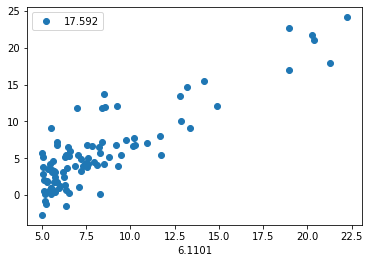

In [6]:
advert.plot(x="6.1101", y="17.592", style="o")
plt.show()


In [7]:
x_mean = advert["6.1101"].mean()
y_mean = advert["17.592"].mean()
print(x_mean, y_mean)

8.18115104166667 5.716709374999997


In [9]:
advert["x"] = advert["6.1101"] - x_mean
advert["y"] = advert["17.592"] - y_mean
advert["x*y"] = advert["x"] * advert["y"]
advert["x^2"] = advert["x"]**2
advert["y^2"] = advert["y"]**2
advert

,6.1101,17.592,x,y,x*y,x^2,y^2
0,5.5277,9.13020,-2.653451,3.413491,-9.057530,7.040802,11.651918
1,8.5186,13.66200,0.337449,7.945291,2.681130,0.113872,63.127643
2,7.0032,11.85400,-1.177951,6.137291,-7.229428,1.387569,37.666336
3,5.8598,6.82330,-2.321351,1.106591,-2.568785,5.388671,1.224543
4,8.3829,11.88600,0.201749,6.169291,1.244648,0.040703,38.060147
...,...,...,...,...,...,...,...
91,5.8707,7.20290,-2.310451,1.486191,-3.433771,5.338184,2.208763
92,5.3054,1.98690,-2.875751,-3.729809,10.726003,8.269944,13.911478
93,8.2934,0.14454,0.112249,-5.572169,-0.625470,0.012600,31.049072
94,13.3940,9.05510,5.212849,3.338391,17.402526,27.173794,11.144852


In [10]:
summation_x_y = advert["x*y"].sum()
summation_x_squared = advert["x^2"].sum()
summation_y_squared = advert["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)

1739.5603117330625 1433.450824539896 2775.2783647179626


In [11]:
correlation = summation_x_y / (summation_x_squared * summation_y_squared)**0.5
correlation

0.87215729196859

In [12]:
def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

In [13]:
def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5

In [14]:
std_deviation_x = getStandardDeviation(advert["x"].tolist())
std_deviation_y = getStandardDeviation(advert["y"].tolist())
print(std_deviation_x, std_deviation_y)

3.8641660707441887 5.37672294548257


In [15]:
m = correlation * (std_deviation_y / std_deviation_x)
m

1.2135472539083576

In [18]:
c = advert["6.1101"].mean() - m * advert["17.592"].mean()
c

1.2436540782432601

In [20]:
advert["y_prediction"] = m * advert["6.1101"] + c
advert

,6.1101,17.592,x,y,x*y,x^2,y^2,y_prediction
0,5.5277,9.13020,-2.653451,3.413491,-9.057530,7.040802,11.651918,7.951779
1,8.5186,13.66200,0.337449,7.945291,2.681130,0.113872,63.127643,11.581378
2,7.0032,11.85400,-1.177951,6.137291,-7.229428,1.387569,37.666336,9.742368
3,5.8598,6.82330,-2.321351,1.106591,-2.568785,5.388671,1.224543,8.354798
4,8.3829,11.88600,0.201749,6.169291,1.244648,0.040703,38.060147,11.416699
...,...,...,...,...,...,...,...,...
91,5.8707,7.20290,-2.310451,1.486191,-3.433771,5.338184,2.208763,8.368026
92,5.3054,1.98690,-2.875751,-3.729809,10.726003,8.269944,13.911478,7.682008
93,8.2934,0.14454,0.112249,-5.572169,-0.625470,0.012600,31.049072,11.308087
94,13.3940,9.05510,5.212849,3.338391,17.402526,27.173794,11.144852,17.497906


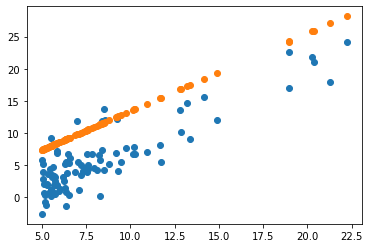

In [21]:
plot1 = plt.scatter(advert["6.1101"], advert["17.592"])
plot2 = plt.scatter(advert["6.1101"], advert["y_prediction"])
plt.show()